# Medical Cost Personal Insurance Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains details of customers in which both numerical and categorical data is present. In this dataset 'charges' is
our target variable as all the other independent columns helps in determining how much amount a customer has to pay.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory data analysis (EDA)

In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset contains three types of datatypes(int64,object,float64)

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values are present in any columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

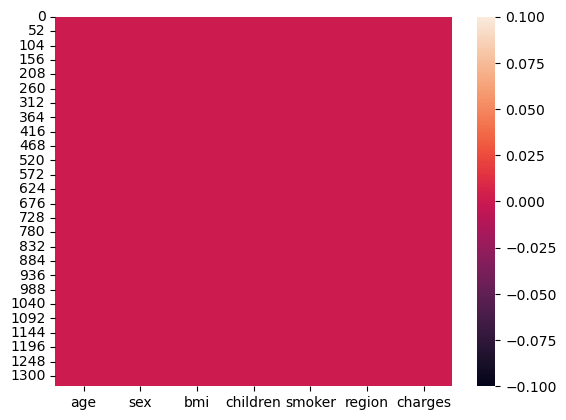

In [13]:
sns.heatmap(df.isnull())

In [15]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [16]:
df['charges'].nunique()

1337

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [19]:
#Seperating categorical and numerical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

categorical columns: ['sex', 'smoker', 'region']


numerical columns: ['age', 'bmi', 'children', 'charges']


# Summary of data

In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1) mean is almost equal to median in all columns except charges(mean>median) mean data is skewed towards right
2) There is a difference between 75th percentile and max value which indicates outliers are there.

# Data Visualisation

male      676
female    662
Name: sex, dtype: int64


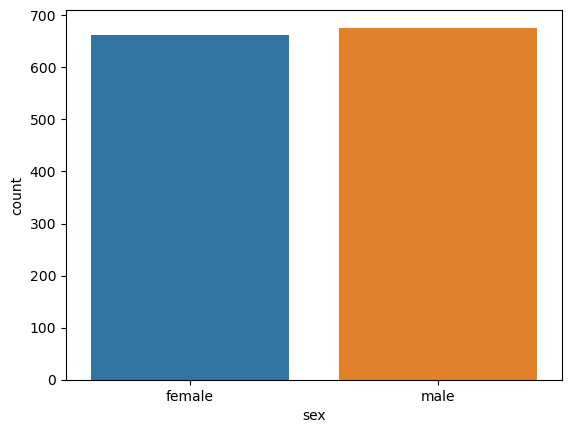

In [22]:
print(df['sex'].value_counts())
ab=sns.countplot(x='sex',data=df)
plt.show()

No. of male and female are almost equal

no     1064
yes     274
Name: smoker, dtype: int64


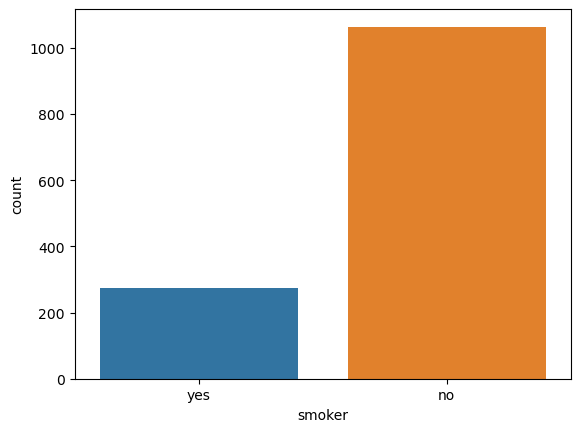

In [23]:
print(df['smoker'].value_counts())
ab=sns.countplot(x='smoker',data=df)
plt.show()

No of non smokers are more than smokers

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


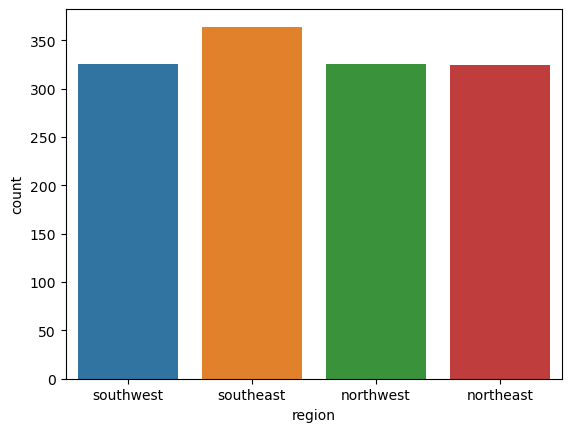

In [24]:
print(df['region'].value_counts())
ab=sns.countplot(x='region',data=df)
plt.show()

No. of people from southeast region are more than others

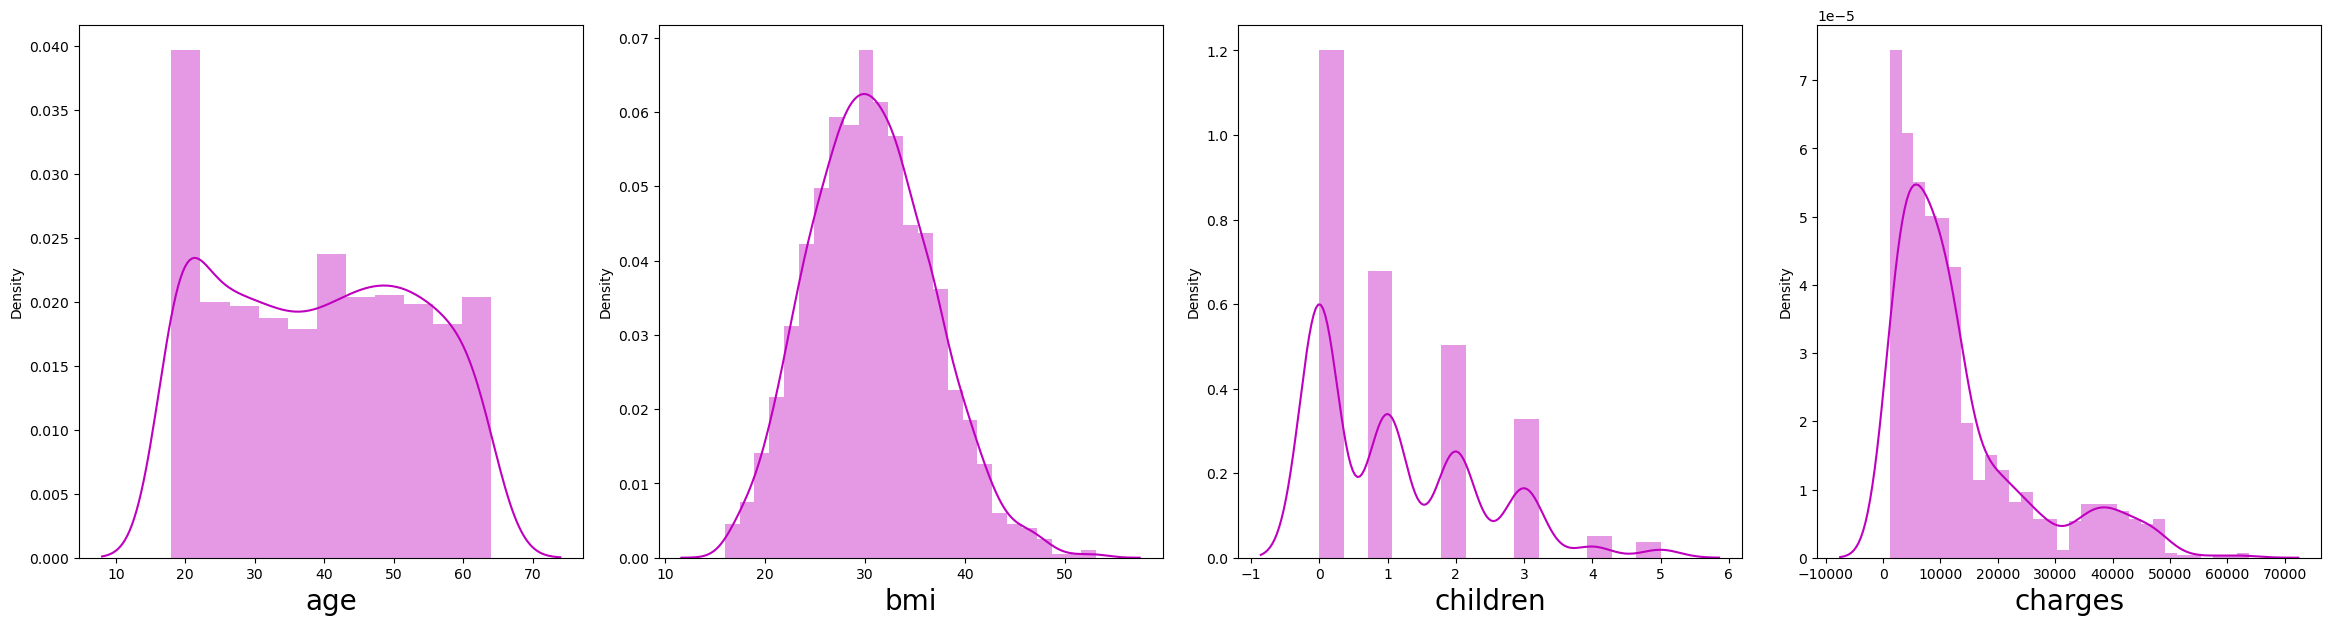

In [25]:
plt.figure(figsize=(35,30), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
plt.show()    

Here data is normally distributed except children and charges columns where data seemed to be skewed towards right

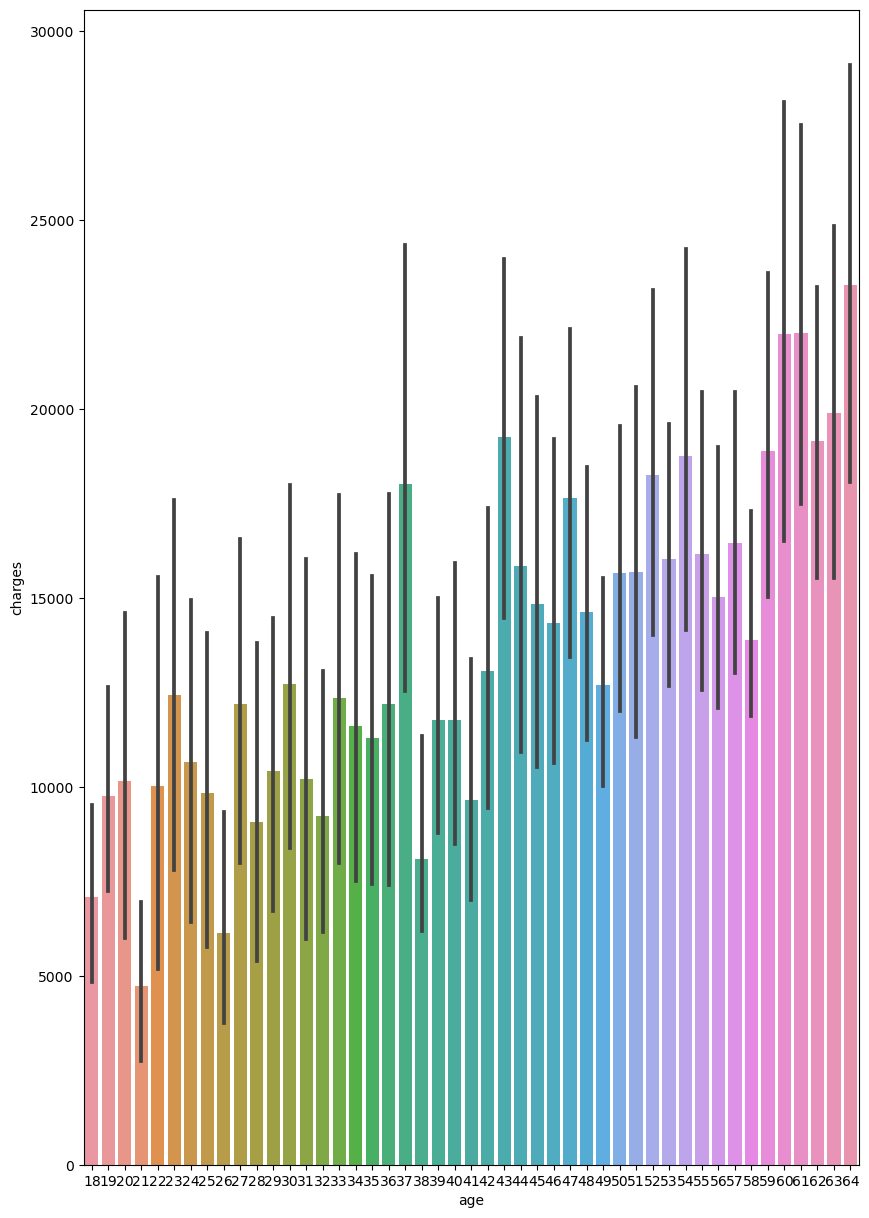

In [32]:
# plot between age and charges
plt.figure(figsize=(10,15))
ax=sns.barplot(x='age',y='charges',data=df)
plt.show()

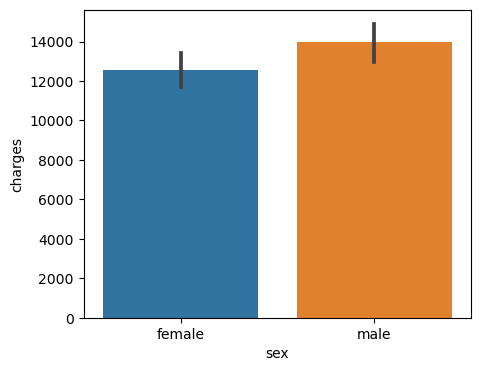

In [37]:
# plot between sex and charges
plt.figure(figsize=(5,4))
ax=sns.barplot(x='sex',y='charges',data=df)
plt.show()

charges for male is more than female

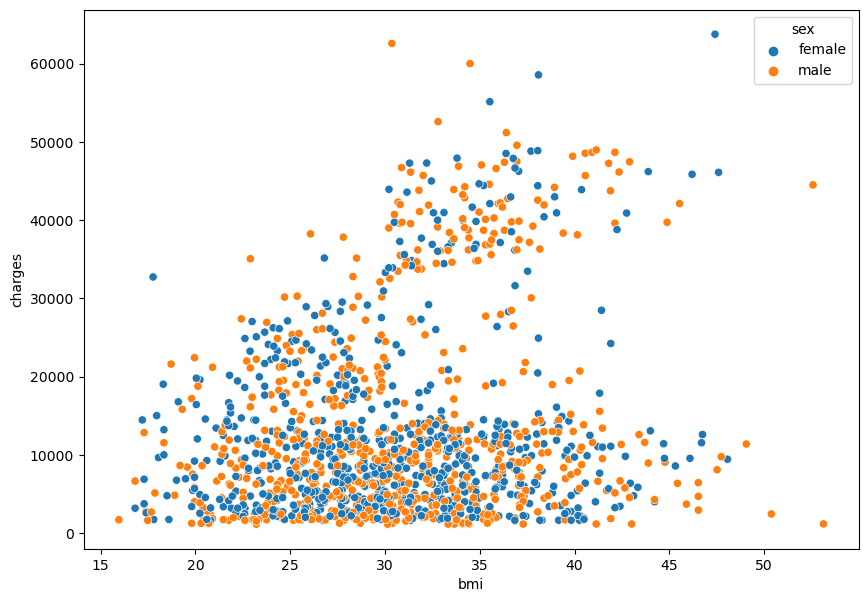

In [41]:
# plot between bmi and charges
plt.figure(figsize=(10,7))
ax=sns.scatterplot(x='bmi',y='charges',data=df,hue='sex')
plt.show()

For charges 10000 around bmi range 20-35 more no. of male and female are present.

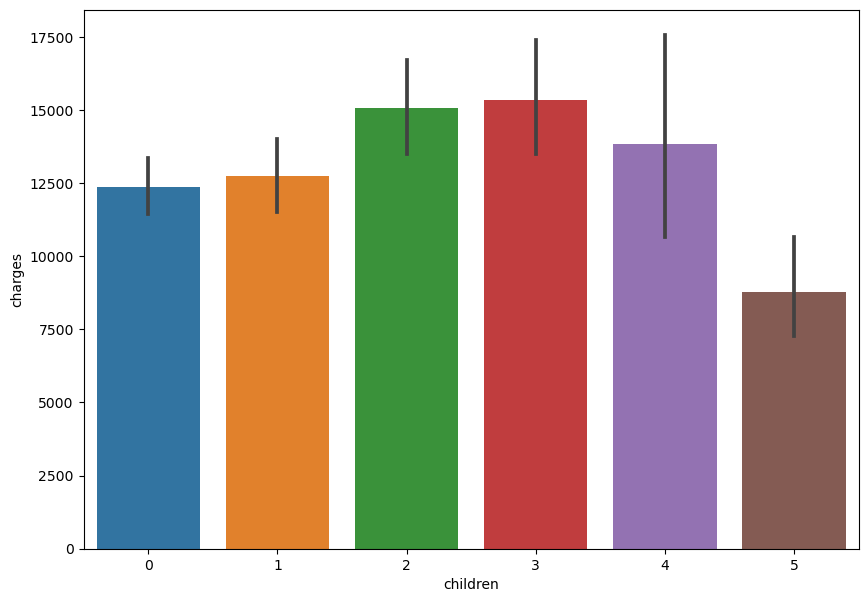

In [45]:
# plot between children and charges
plt.figure(figsize=(10,7))
ax=sns.barplot(x='children',y='charges',data=df)
plt.show()

Charges for people with three children is higher

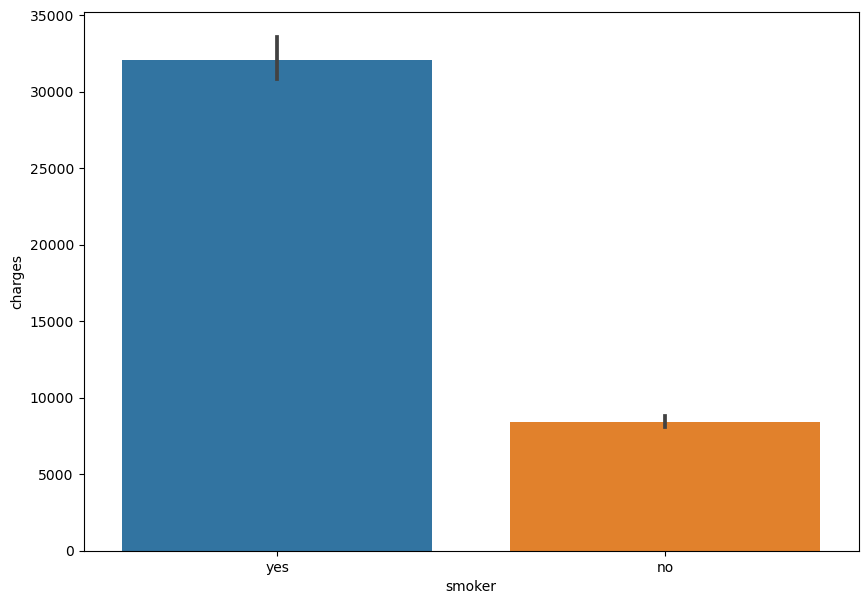

In [46]:
# plot between smoker and charges
plt.figure(figsize=(10,7))
ax=sns.barplot(x='smoker',y='charges',data=df)
plt.show()

Charges for people who smokes is way higher than non smokers.

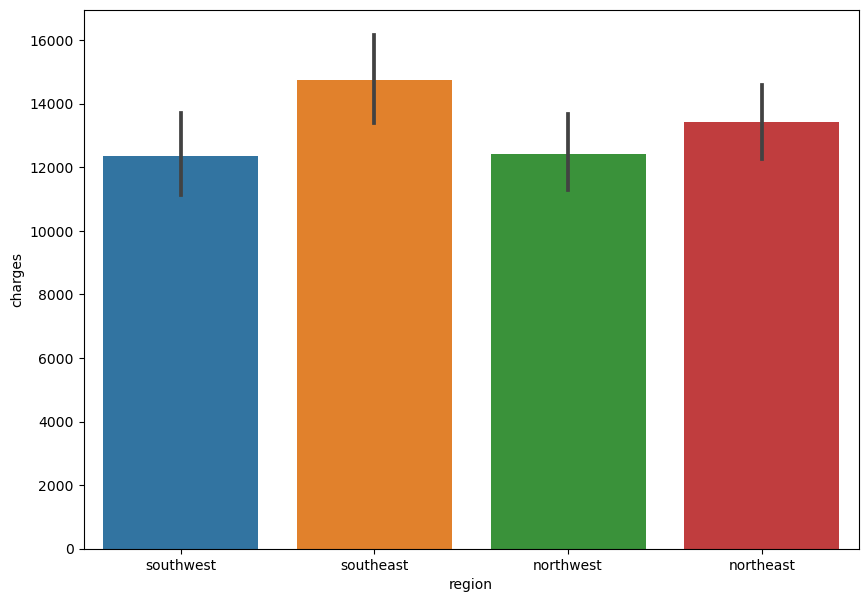

In [47]:
# plot between region and charges
plt.figure(figsize=(10,7))
ax=sns.barplot(x='region',y='charges',data=df)
plt.show()

Peolpe living in southeast have to pay more charges than others.

# Checking for outliers

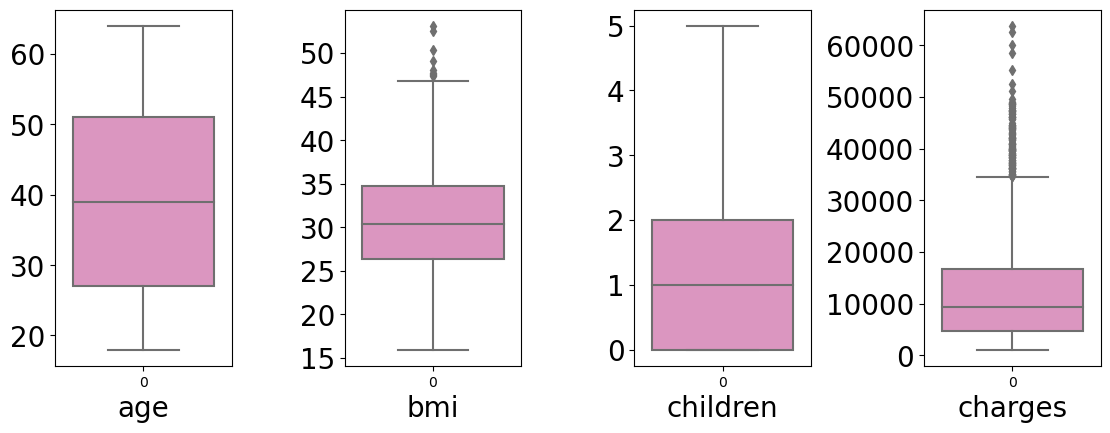

In [50]:
plt.figure(figsize=(17,21), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(5,6,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col,fontsize=20)
        plt.yticks(rotation=0,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
plt.show()    

outliers are present in bmi and charges. Since charges is a target variable so outliers will not be removed from there. We'll remove
bmi outliers

In [57]:
from scipy.stats import zscore

In [60]:
out=df[['bmi']]
z=np.abs(zscore(out))
z

,bmi
0,0.453320
1,0.509621
2,0.383307
3,1.305531
4,0.292556
...,...
1333,0.050297
1334,0.206139
1335,1.014878
1336,0.797813


In [61]:
threshold=3
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64), array([0, 0, 0, 0], dtype=int64))


As we can see there are only few outliers in bmi so no need to remove them

# Encoding to convert data into numerical data

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df        

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In the above encoding
sex: male= 1
     female= 0
        
smoker: yes= 1
        no= 0

region: southwest= 3
        southeast= 2
        northwest= 1
        northeast= 4

In [68]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

children,smoker and charges have skewness.We'll only remove skewness from children

In [69]:
df['children']=np.cbrt(df['children'])

In [70]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

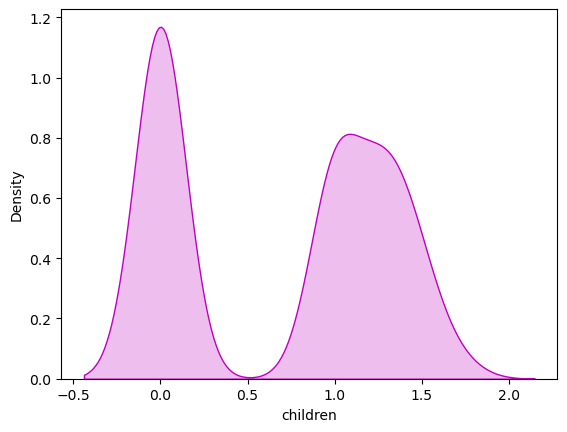

In [71]:
sns.distplot(df['children'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

skewness removed

# Checking correlation between target and independent variables

In [73]:
cor=df.corr()

In [74]:
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.048919,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.016183,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.016515,0.003750,0.157566,0.198341
children,0.048919,0.016183,0.016515,1.000000,0.011829,0.014133,0.072756
smoker,-0.025019,0.076185,0.003750,0.011829,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.014133,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.072756,0.787251,-0.006208,1.000000


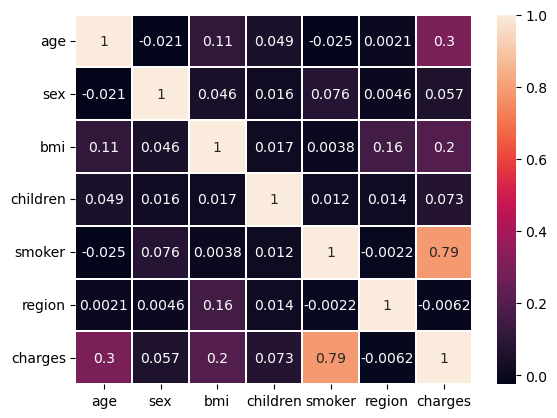

In [77]:
#graphical representation of above correlated values
sns.heatmap(df.corr(),annot=True,linewidth=0.1,fmt='.2g')
plt.show()

As we see age,bmi and smoker are highly correlated with charges. And region, children and sex are less correlated with charges.

# Seperating the data

In [78]:
x=df.drop('charges',axis=1)
y=df['charges']

In [79]:
print('Feature dimension', x.shape)
print('Label dimension', y.shape)

Feature dimension (1338, 6)
Label dimension (1338,)


# Scaling using standard scaler method

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-1.117604,1.970587,1.343905
1,-1.509965,0.989591,0.509621,0.502009,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.218282,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-1.117604,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-1.117604,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.218282,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-1.117604,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-1.117604,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-1.117604,-0.507463,1.343905


# Model building

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge

In [83]:
maxAccu=0
maxRS=0
for i in range(1,220):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2_score is:',maxAccu, 'at random state:',maxRS)

Maximum r2_score is: 0.802332357392094 at random state: 112


In [84]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=maxRS)

In [86]:
model=[RandomForestRegressor(),
        DecisionTreeRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
        Lasso(),
        Ridge()]  

In [89]:
for m in model:
    m.fit(x_train,y_train)
    pred_m=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Model prediction for :',m)
    print('r2 score:',r2_score(y_test, pred_m))
    print('r2 score on training data:',r2_score(y_train, pred_train))
    print('mean absolute error :',mean_absolute_error(y_test, pred_m))
    print('mean squared error :',mean_squared_error(y_test, pred_m))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test, pred_m)))
    print('\n')

Model prediction for : RandomForestRegressor()
r2 score: 0.8971301916898143
r2 score on training data: 0.9722877527097074
mean absolute error : 2267.6700226921844
mean squared error : 15695373.772367701
root mean squared error : 3961.7387309573687


Model prediction for : DecisionTreeRegressor()
r2 score: 0.8020398162968565
r2 score on training data: 0.9986401505730053
mean absolute error : 2321.9553701965174
mean squared error : 30203799.60171233
root mean squared error : 5495.79835890222


Model prediction for : AdaBoostRegressor()
r2 score: 0.8073924817160736
r2 score on training data: 0.7772784860114559
mean absolute error : 4717.258593768482
mean squared error : 29387116.010937903
root mean squared error : 5420.98847175844


Model prediction for : GradientBoostingRegressor()
r2 score: 0.9126776818095683
r2 score on training data: 0.8920974656760883
mean absolute error : 2182.3093494021587
mean squared error : 13323213.537404275
root mean squared error : 3650.097743541161


Model p

Here GradientBoostingRegressor is giving the best r2_score that is .91

# Cross validation to check actual performance of these above models

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Cross validation score for :',m)
    print('Model score :',score)
    print('mean score :',score.mean())
    print('difference between r2 score and Cross validation score :',r2_score(y_test, pred_m)-score.mean())
    print('\n')

Cross validation score for : RandomForestRegressor()
Model score : [0.85332385 0.76947238 0.86808213 0.82886516 0.85376363]
mean score : 0.8347014307718533
difference between r2 score and Cross validation score : -0.032367857402757605


Cross validation score for : DecisionTreeRegressor()
Model score : [0.76533603 0.70425225 0.73824016 0.71681718 0.6778236 ]
mean score : 0.7204938437258139
difference between r2 score and Cross validation score : 0.08183972964328179


Cross validation score for : AdaBoostRegressor()
Model score : [0.84363325 0.78068153 0.83125566 0.81525527 0.83408702]
mean score : 0.8209825466507571
difference between r2 score and Cross validation score : -0.018648973281661374


Cross validation score for : GradientBoostingRegressor()
Model score : [0.87510841 0.79156836 0.89426987 0.8489758  0.85967904]
mean score : 0.8539202957913818
difference between r2 score and Cross validation score : -0.051586722422286124


Cross validation score for : Lasso()
Model score : [0.

# Hyper Parameter tuning

In [92]:
from sklearn.model_selection import GridSearchCV 

In [103]:
parameters={'subsample':[0.5,0.7,1.0],'max_depth':[3,5,7],
            'learning_rate':[0.001,0.01,0.1,1.0]}
gcvs=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gcvs.fit(x_train,y_train)
gcvs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}

# Final Model

In [104]:
model_test=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,subsample=1.0)
model_test.fit(x_train,y_train)
pred_g=model_test.predict(x_test)
print('r2 score:',r2_score(y_test, pred_g))
print('mean absolute error :',mean_absolute_error(y_test, pred_g))
print('mean squared error :',mean_squared_error(y_test, pred_g))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test, pred_g)))

r2 score: 0.9129536237828239
mean absolute error : 2178.260746320194
mean squared error : 13281111.656581564
root mean squared error : 3644.3259536684645


# Saving the model

In [105]:
import joblib
joblib.dump(model_test,'medical_cost_insurance.pkl')

['medical_cost_insurance.pkl']

# Predicting the same model for future use

In [107]:
mod=joblib.load('medical_cost_insurance.pkl')
prediction=mod.predict(x_test)
print('insurance costs',prediction[0])

insurance costs 11694.5411764428


In [109]:
a=np.array(y_test)
df_new=pd.DataFrame()
df_new['predicted']=prediction
df_new['original']=a
df_new

,predicted,original
0,11694.541176,11090.71780
1,8721.431190,8017.06115
2,34358.227794,34617.84065
3,24441.449124,24535.69855
4,24643.067288,23967.38305
...,...,...
397,6706.961295,5972.37800
398,6295.285247,5245.22690
399,9987.282265,6948.70080
400,8099.911621,2680.94930
